
1. You are provided the titanic dataset. Load the dataset and perform splitting into training and test sets with 70:30 ratio randomly using test train split.
2. Use the Logistic regression created from scratch (from the prev question) in this question as well.
3. Data cleaning plays a major role in this question. Report all the methods used by you in the ipynb.

--> 

i. Check for missing values

ii. Drop Columns & Handle missing values

iii. Create dummies for categorical features

you are free to perform other data cleaning to improve your results.



4. Report accuracy score, Confusion matrix, heat map, classifiaction report and any other metrics you feel useful.

dataset link : 
https://iiitaphyd-my.sharepoint.com/:f:/g/personal/apurva_jadhav_students_iiit_ac_in/Eictt5_qmoxNqezgQQiMWeIBph4sxlfA6jWAJNPnV2SF9Q?e=mQmYN0 

(titanic.csv)


In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [85]:
df = pd.read_csv('titanic.csv')

In [74]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [75]:
print('Missing Values in the columns : \n')
print(df.isnull().sum())

Missing Values in the columns : 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [76]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Fischer, Mr. Eberhard Thelander",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Data cleaning
1. **Removal** :-
- Remove *Name* column as this attribute does not affect the *Survived* status of the passenger. And moreover we can see that each person has a unique name hence there is no point considering this column.
- Remove *Ticket* because there are 681 unique values of ticket and moreover if there is some correlation between the ticket and *Survived* status that can be captured by *Fare*.
- Remove *Cabin* as there are lot of missing values

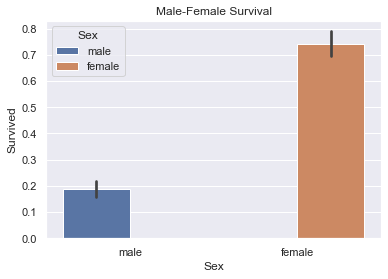

In [86]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'PassengerId'])
s1 = sns.barplot(data = df, y='Survived' ,  hue='Sex' , x='Sex')
s1.set_title('Male-Female Survival')
plt.show()

Females had a better survival rate than male.

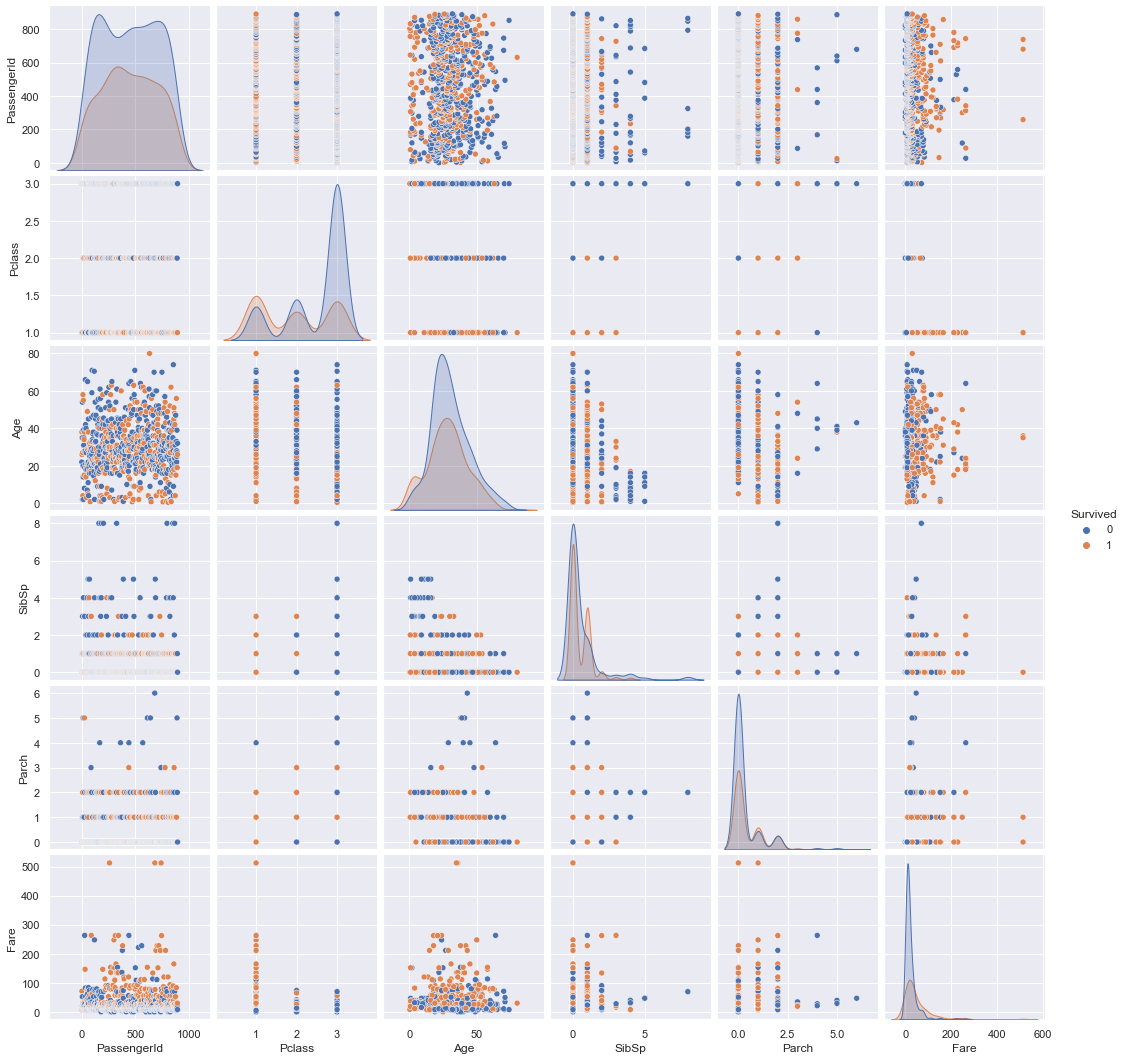

In [31]:
sns.pairplot(df, hue='Survived')

### Categorical data
For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst.

Forcing an ordinal relationship via an ordinal encoding and allowing the model to assume a natural ordering between categories may result in poor performance or unexpected results (predictions halfway between categories).

In this case, a one-hot encoding can be applied to the ordinal representation. This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable.

### Dummy Variables
The one-hot encoding creates one binary variable for each category.

The problem is that this representation includes redundancy. For example, if we know that [1, 0, 0] represents “blue” and [0, 1, 0] represents “green” we don’t need another binary variable to represent “red“, instead we could use 0 values for both “blue” and “green” alone, e.g. [0, 0].

This is called a dummy variable encoding, and always represents C categories with C-1 binary variables.

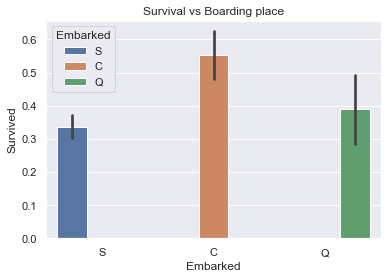

In [87]:
from numpy import mean
s1 = sns.barplot(data = df, y='Survived' ,  hue='Embarked' , x='Embarked', estimator=mean)
s1.set_title('Survival vs Boarding place')
plt.show()

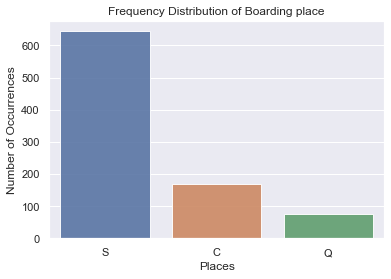

In [88]:
carrier_count = df['Embarked'].value_counts()
sns.barplot(x=carrier_count.index, y=carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Boarding place')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Places', fontsize=12)
plt.show()

In [89]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'])
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1


In [96]:
print('Missing Values in the columns : \n')
print(df.isnull().sum())

Missing Values in the columns : 

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


29.69911764705882

In [92]:
df = df.fillna(df['Age'].mean())

In [93]:
print('Missing Values in the columns : \n')
print(df.isnull().sum())

Missing Values in the columns : 

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


In [97]:
df = df.astype(np.float64)

In [99]:
Y = df['Survived']
df.drop(columns=['Survived'], inplace=True)

In [106]:
def standardise(df, col):
    df[col] = (df[col] - df[col].mean())/df[col].std()
    return df

for col in df.columns:
    df = standardise(df, col)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.826913,-0.592148,0.432550,-0.473408,-0.502163,-0.737281,0.737281,-0.481772,-0.307390,0.618959
1,-1.565228,0.638430,0.432550,-0.473408,0.786404,1.354813,-1.354813,2.073341,-0.307390,-1.613803
2,0.826913,-0.284503,-0.474279,-0.473408,-0.488580,1.354813,-1.354813,-0.481772,-0.307390,0.618959
3,-1.565228,0.407697,0.432550,-0.473408,0.420494,1.354813,-1.354813,-0.481772,-0.307390,0.618959
4,0.826913,0.407697,-0.474279,-0.473408,-0.486064,-0.737281,0.737281,-0.481772,-0.307390,0.618959
5,0.826913,0.000000,-0.474279,-0.473408,-0.477848,-0.737281,0.737281,-0.481772,3.249548,-1.613803
6,-1.565228,1.869009,-0.474279,-0.473408,0.395591,-0.737281,0.737281,-0.481772,-0.307390,0.618959
7,0.826913,-2.130371,2.246209,0.767199,-0.223957,-0.737281,0.737281,-0.481772,-0.307390,0.618959
8,0.826913,-0.207592,-0.474279,2.007806,-0.424018,1.354813,-1.354813,-0.481772,-0.307390,0.618959
9,-0.369158,-1.207437,0.432550,-0.473408,-0.042931,1.354813,-1.354813,2.073341,-0.307390,-1.613803
